## Inference

### Create mel-spectrograms

In [13]:
!cd ../src/; python dataset.py -f ../data/LJSpeech-1.1/test_files.txt -o ../data/LJSpeech-1.1/mels -c ../data/LJSpeech-1.1/config.json;

/home/yuki/anaconda3/envs/dlpractioners/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
../data/LJSpeech-1.1/mels/LJ001-0001.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0002.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0003.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0004.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0005.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0006.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0007.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0008.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0009.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0010.wav.pt


### Display one of the mel-spectrograms

(80, 832)


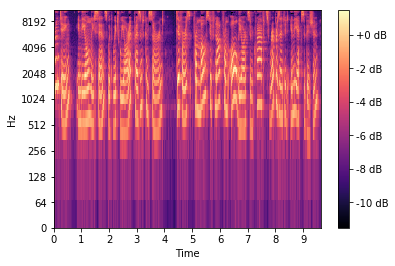

In [16]:
import torch
import torch.utils.data
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

FILE_PATH = "../data/LJSpeech-1.1/mels/LJ001-0001.wav.pt"
mel = torch.load(FILE_PATH)
mel_np = mel.to('cpu').detach().numpy().copy()
print(mel_np.shape)

librosa.display.specshow(mel_np, sr=22050, hop_length=256, 
                         x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

### Create a list of mel-spectrograms

In [18]:
!cd ../src/; ls ../data/LJSpeech-1.1/mels/*.pt > ../data/LJSpeech-1.1/mel_files.txt
!cat ../data/LJSpeech-1.1/mel_files.txt

../data/LJSpeech-1.1/mels/LJ001-0001.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0002.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0003.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0004.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0005.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0006.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0007.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0008.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0009.wav.pt
../data/LJSpeech-1.1/mels/LJ001-0010.wav.pt


### Check the checkpoints files

In [19]:
!ls ../data/LJSpeech-1.1/checkpoints/

waveglow_0	waveglow_12000	waveglow_4000  waveglow_8000
waveglow_10000	waveglow_2000	waveglow_6000


### Run inference (Pick one of the files in "checkpoints" folder above and modify the following command)

In [21]:
!cd ../src/; python evaluate.py -f ../data/LJSpeech-1.1/mel_files.txt -w ../data/LJSpeech-1.1/checkpoints/waveglow_8000 -o ../data/LJSpeech-1.1/result/ --is_fp16 -s 0.6

../data/LJSpeech-1.1/checkpoints/waveglow_8000
Selected optimization level O3:  Pure FP16 training.
Defaults for this optimization level are:
enabled                : True
opt_level              : O3
cast_model_type        : torch.float16
patch_torch_functions  : False
keep_batchnorm_fp32    : False
master_weights         : False
loss_scale             : 1.0
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O3
cast_model_type        : torch.float16
patch_torch_functions  : False
keep_batchnorm_fp32    : False
master_weights         : False
loss_scale             : 1.0
../data/LJSpeech-1.1/result/LJ001-0001.wav_synthesis.wav
../data/LJSpeech-1.1/result/LJ001-0002.wav_synthesis.wav
../data/LJSpeech-1.1/result/LJ001-0003.wav_synthesis.wav
../data/LJSpeech-1.1/result/LJ001-0004.wav_synthesis.wav
../data/LJSpeech-1.1/result/LJ001-0005.wav_synthesis.wav
../data/LJSpee

### Play one of the audio files 

In [23]:
import IPython.display
IPython.display.Audio("../data/LJSpeech-1.1/result/LJ001-0001.wav_synthesis.wav")